In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
import networkx as nx
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud

In [3]:
store_data = pd.read_csv("store_data.csv", header=None)
display(store_data.head())
print(store_data.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(7501, 20)


In [4]:
# Clean Data: Remove NaN values
store_data.dropna(how='all', inplace=True)
store_data.fillna('', inplace=True)

In [5]:
# Convert dataset into a list of transactions
records = []
for i in range(len(store_data)):
    records.append([str(store_data.values[i, j]) for j in range(store_data.shape[1]) if str(store_data.values[i, j]) != ''])

In [6]:
print(type(records))

<class 'list'>


In [7]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [8]:
print("There are {} Relation derived.".format(len(association_results)))

There are 24 Relation derived.


In [9]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'light cream', 'chicken'})
frozenset({'mushroom cream sauce', 'escalope'})
frozenset({'pasta', 'escalope'})
frozenset({'herb & pepper', 'ground beef'})
frozenset({'tomato sauce', 'ground beef'})
frozenset({'olive oil', 'whole wheat pasta'})
frozenset({'pasta', 'shrimp'})
frozenset({'chocolate', 'shrimp', 'frozen vegetables'})
frozenset({'ground beef', 'cooking oil', 'spaghetti'})
frozenset({'frozen vegetables', 'ground beef', 'spaghetti'})
frozenset({'olive oil', 'milk', 'frozen vegetables'})
frozenset({'shrimp', 'mineral water', 'frozen vegetables'})
frozenset({'olive oil', 'frozen vegetables', 'spaghetti'})
frozenset({'shrimp', 'frozen vegetables', 'spaghetti'})
frozenset({'tomatoes', 'frozen vegetables', 'spaghetti'})
frozenset({'grated cheese', 'ground beef', 'spaghetti'})
frozenset({'herb & pepper', 'ground beef', 'mineral water'})
frozenset({'herb & pepper', 'ground beef', 'spaghetti'})
frozenset({'olive oil', 'milk', 'ground beef'})
frozenset({'shrimp', 'ground beef',

In [10]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: light cream -> chicken
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: mushroom cream sauce -> escalope
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: pasta -> escalope
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: tomato sauce -> ground beef
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: olive oil -> whole wheat pasta
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: pasta -> shrimp
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.506672147735896
Rule: chocolate -> shrimp
Support: 0.005332622317024397
Confidence: 0.23255813953488375
Lift: 3.2545123221103784
Rule: ground beef -> cooking oil
Support: 0.004799360085321957
Confiden

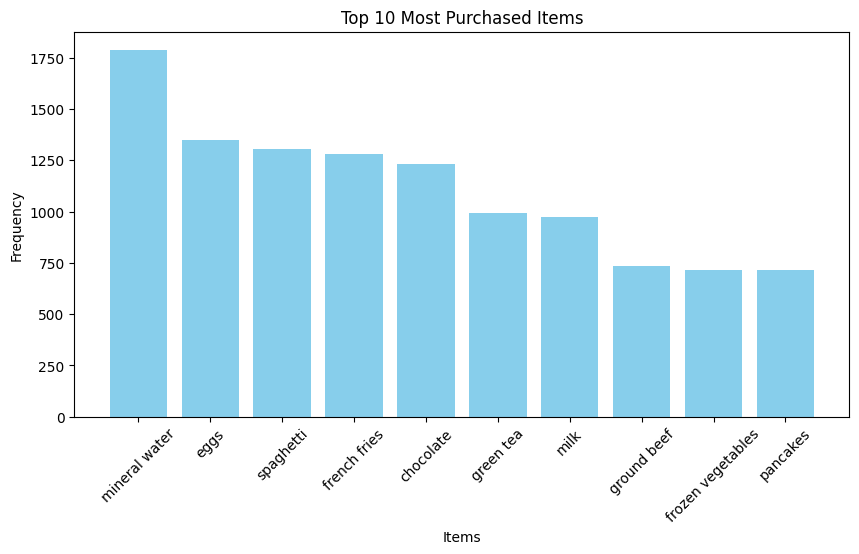

In [11]:
all_items = [item for transaction in records for item in transaction]
item_counts = Counter(all_items)
top_items = item_counts.most_common(10)
items, counts = zip(*top_items)

plt.figure(figsize=(10,5))
plt.bar(items, counts, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.title("Top 10 Most Purchased Items")
plt.show()

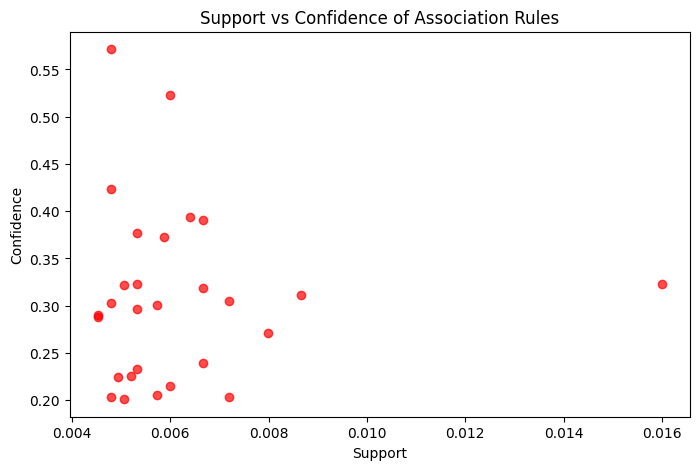

In [12]:
support_values = []
confidence_values = []
for rule in association_results:
    for ordered_stat in rule.ordered_statistics:
        support_values.append(rule.support)
        confidence_values.append(ordered_stat.confidence)

plt.figure(figsize=(8,5))
plt.scatter(support_values, confidence_values, alpha=0.7, color='red')
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence of Association Rules")
plt.show()


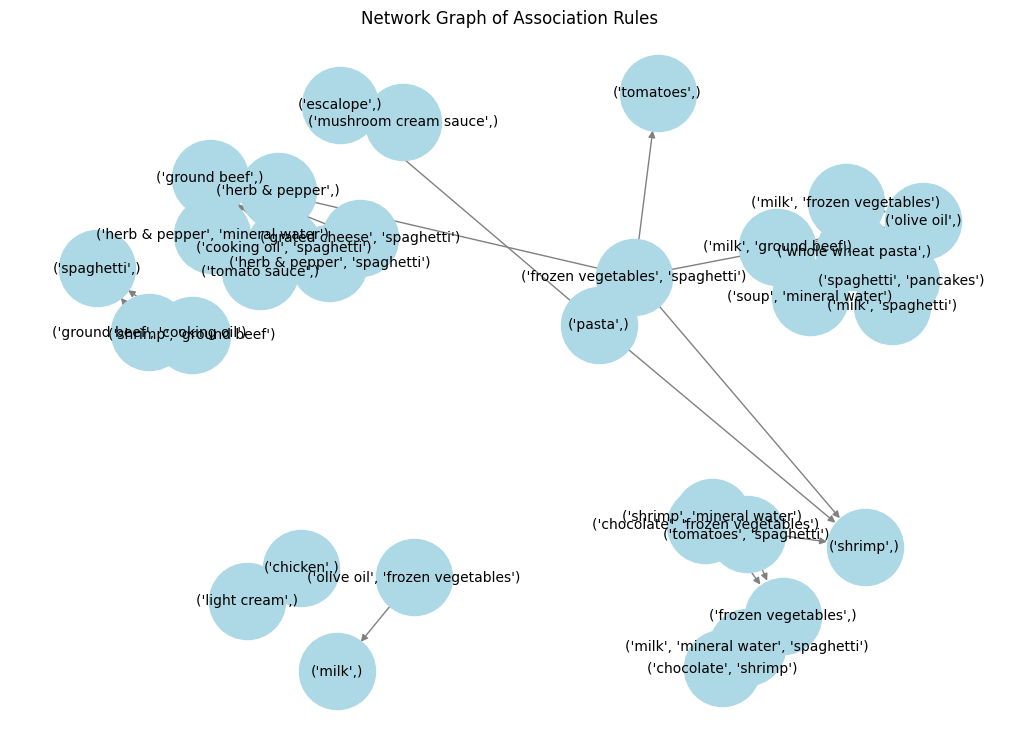

In [13]:
G = nx.DiGraph()
for rule in association_results:
    for ordered_stat in rule.ordered_statistics:
        item_base = tuple(ordered_stat.items_base)
        item_add = tuple(ordered_stat.items_add)
        if item_base and item_add:
            G.add_edge(item_base, item_add, weight=ordered_stat.lift)

plt.figure(figsize=(10,7))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
plt.title("Network Graph of Association Rules")
plt.show()


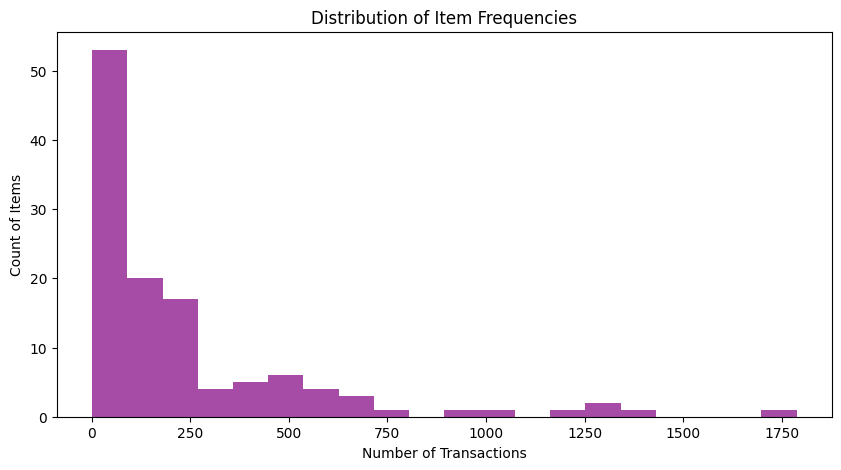

In [14]:
plt.figure(figsize=(10,5))
plt.hist(item_counts.values(), bins=20, color='purple', alpha=0.7)
plt.xlabel("Number of Transactions")
plt.ylabel("Count of Items")
plt.title("Distribution of Item Frequencies")
plt.show()


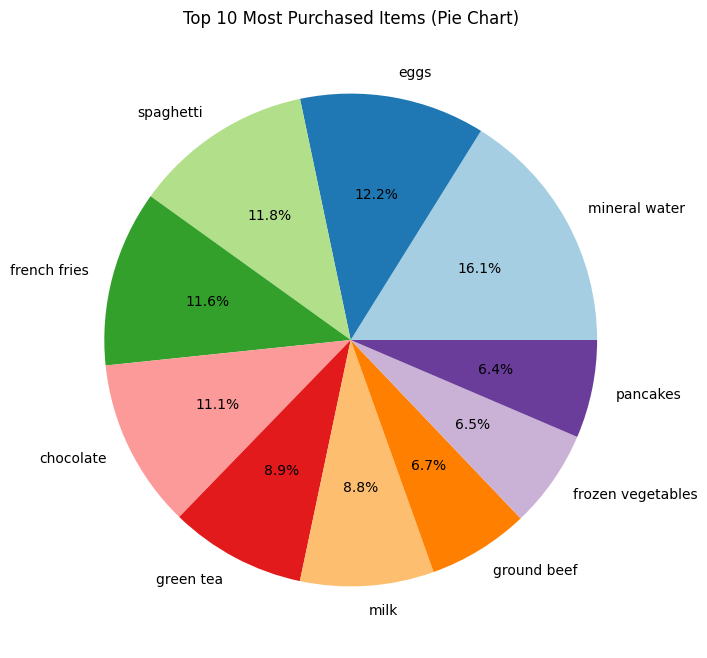

In [15]:
plt.figure(figsize=(8,8))
plt.pie(counts, labels=items, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Top 10 Most Purchased Items (Pie Chart)")
plt.show()

In [16]:
item_pair_probabilities = {}
for rule in association_results:
    for ordered_stat in rule.ordered_statistics:
        item_base = tuple(ordered_stat.items_base)
        item_add = tuple(ordered_stat.items_add)
        if item_base and item_add:
            key = f"{', '.join(item_base)} -> {', '.join(item_add)}"
            item_pair_probabilities[key] = ordered_stat.confidence

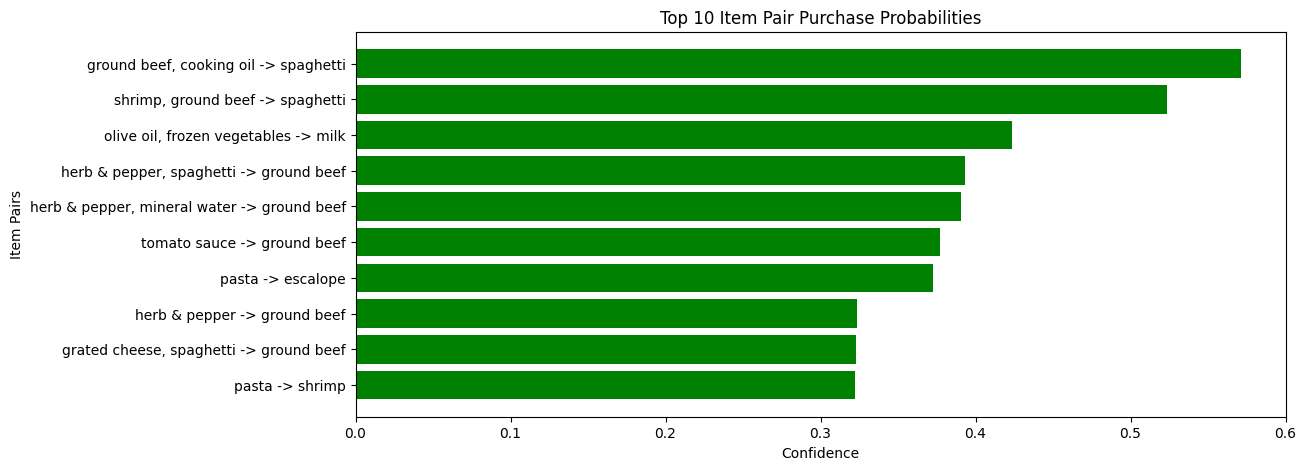

In [17]:
sorted_items = sorted(item_pair_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]
labels, values = zip(*sorted_items)

plt.figure(figsize=(12,5))
plt.barh(labels, values, color='green')
plt.xlabel("Confidence")
plt.ylabel("Item Pairs")
plt.title("Top 10 Item Pair Purchase Probabilities")
plt.gca().invert_yaxis()
plt.show()


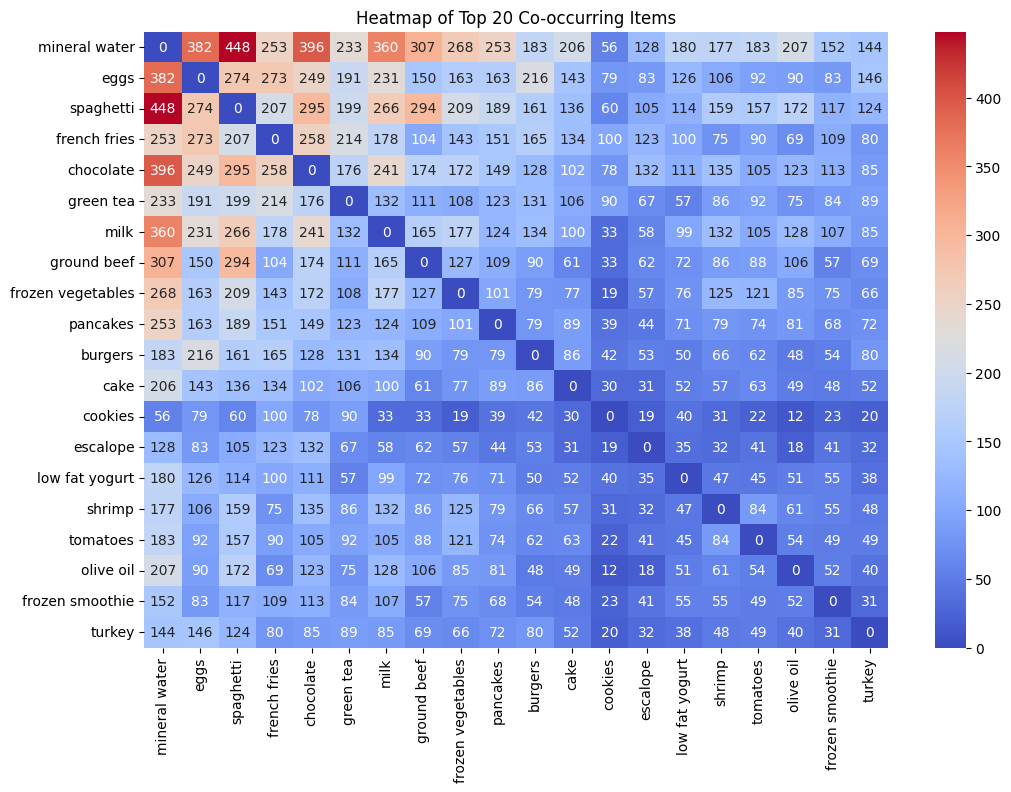

In [20]:
top_20_items = [item[0] for item in item_counts.most_common(20)]
co_occurrence_matrix = pd.DataFrame(0, index=top_20_items, columns=top_20_items)
for transaction in records:
    filtered_transaction = [item for item in transaction if item in top_20_items]
    for item1 in filtered_transaction:
        for item2 in filtered_transaction:
            if item1 != item2:
                co_occurrence_matrix.loc[item1, item2] += 1

plt.figure(figsize=(12,8))
sns.heatmap(co_occurrence_matrix, cmap='coolwarm', annot=True, fmt="d")
plt.title("Heatmap of Top 20 Co-occurring Items")
plt.show()

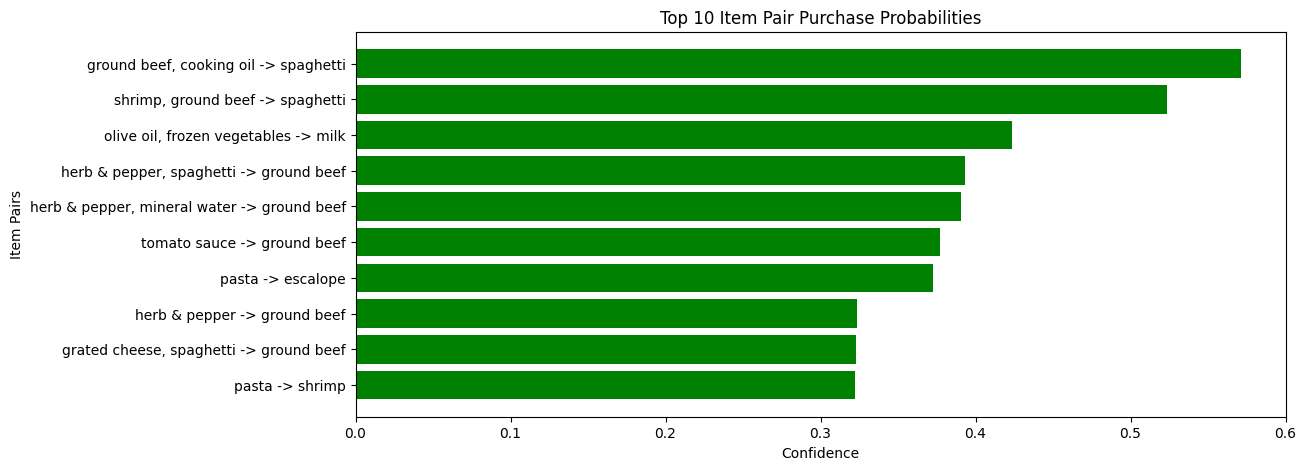

In [19]:
sorted_items = sorted(item_pair_probabilities.items(), key=lambda x: x[1], reverse=True)[:10]
labels, values = zip(*sorted_items)

plt.figure(figsize=(12,5))
plt.barh(labels, values, color='green')
plt.xlabel("Confidence")
plt.ylabel("Item Pairs")
plt.title("Top 10 Item Pair Purchase Probabilities")
plt.gca().invert_yaxis()
plt.show()


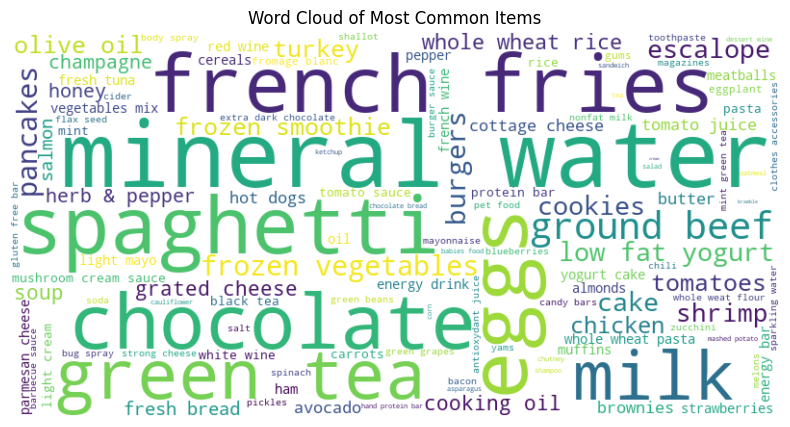

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(item_counts)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Common Items")
plt.show()